In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
#import mnist dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape , y_train.shape

11493376/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,))

In [4]:
#Let's take a peek at a few images from the dataset
import matplotlib

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

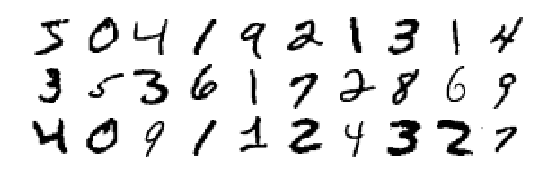

In [5]:
plt.figure(figsize=(9,9))
example_images = x_train[:30]
plot_digits(example_images, images_per_row=10)
plt.show()

In [6]:
#reshape the input:
X_train = x_train.reshape(-1, 784)
X_train.shape

(60000, 784)

In [7]:
n_cols = X_train.shape[1]
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

In [8]:
target = to_categorical(y_train)

In [9]:
# Create the new model: model
model = Sequential()

# Add the first, second, and third hidden layers
model.add(Dense(50, activation = 'relu', input_shape = input_shape))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile mode
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit model
model_training = model.fit(X_train, target, epochs=30, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=1)

Train on 36000 samples, validate on 24000 samples
Epoch 1/30
36000/36000 [==============================] - 7s 185us/step - loss: 1.3528 - accuracy: 0.7784 - val_loss: 0.4425 - val_accuracy: 0.8851
Epoch 2/30
36000/36000 [==============================] - 6s 154us/step - loss: 0.3535 - accuracy: 0.9060 - val_loss: 0.3464 - val_accuracy: 0.9122
Epoch 3/30
36000/36000 [==============================] - 6s 153us/step - loss: 0.2661 - accuracy: 0.9280 - val_loss: 0.2989 - val_accuracy: 0.9188
Epoch 4/30
36000/36000 [==============================] - 6s 154us/step - loss: 0.2192 - accuracy: 0.9384 - val_loss: 0.2692 - val_accuracy: 0.9303
Epoch 5/30
36000/36000 [==============================] - 6s 153us/step - loss: 0.1911 - accuracy: 0.9460 - val_loss: 0.2495 - val_accuracy: 0.9360
Epoch 6/30
36000/36000 [==============================] - 6s 155us/step - loss: 0.1671 - accuracy: 0.9524 - val_loss: 0.2095 - val_accuracy: 0.9417
Epoch 7/30
36000/36000 [==============================] - 6s 1

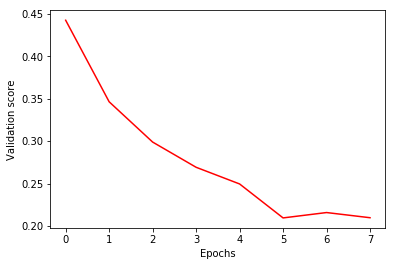

In [11]:
# Create the plot
plt.plot(model_training.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [12]:
# Calculate predictions: predictions
predictions = model.predict_classes(x_test.reshape(-1, 784)[:10])

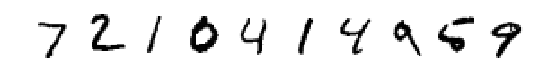

In [13]:
plt.figure(figsize=(9,9))
test_images = x_test[:10]
plot_digits(test_images, images_per_row=10)
plt.show()

In [14]:
predictions

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test, model.predict_classes(x_test.reshape(-1, 784)))
cm

array([[ 964,    0,    1,    1,    0,    3,    5,    1,    2,    3],
       [   0, 1122,    3,    2,    0,    1,    3,    0,    4,    0],
       [  10,    2,  960,   19,    3,    1,    7,    8,   20,    2],
       [   5,    0,   11,  972,    0,    7,    0,    5,    7,    3],
       [   3,    4,    7,    0,  892,    0,   18,    1,    3,   54],
       [  12,    0,    0,   21,    0,  835,   14,    1,    5,    4],
       [  13,    3,    1,    0,    3,    6,  927,    0,    5,    0],
       [   1,    3,   15,   11,    2,    3,    0,  972,    2,   19],
       [   5,    0,    7,   16,    2,   14,   12,    4,  907,    7],
       [   6,    8,    0,   18,    7,    6,    1,    8,    2,  953]])

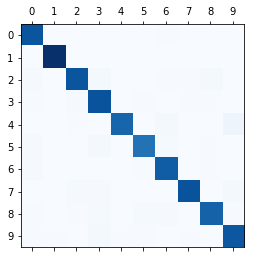

In [16]:
plt.matshow(cm , cmap = plt.cm.Blues)
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,10))
plt.show()

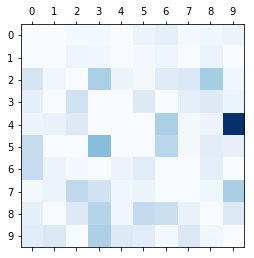

In [17]:
#Let's only focus on the errors

row_sums = cm.sum(axis = 1, keepdims = True)
norm_cm = cm/row_sums
#fill the diagonal with zeros
np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap = plt.cm.Blues)
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,10))
plt.show()